Check the total percentage of missing values of full dataset after dropping columns with more than 70% of missing values

Sensor Component Failure Prediction

1) Problem statement.
Data: Sensor Data

Problem statement :

.)The system in focus is the Air Pressure system (APS) which generates pressurized air that are utilized in various functions in a truck, such as braking and gear changes. The datasets positive class corresponds to component failures for a specific component of the APS system. The negative class corresponds to trucks with failures for components not related to the APS system.

.)The problem is to reduce the cost due to unnecessary repairs. So it is required to minimize the false predictions.

#True class	Positive	Negative	
Predicted class			
Positive	-	cost_1	
Negative	cost_2		
Cost 1 = 10 and Cost 2 = 500

.)The total cost of a prediction model the sum of Cost_1 multiplied by the number of Instances with type 1 failure and Cost_2 with the number of instances with type 2 failure, resulting in a Total_cost. In this case Cost_1 refers to the cost that an unnessecary check needs to be done by an mechanic at an workshop, while Cost_2 refer to the cost of missing a faulty truck, which may cause a breakdown.

.) Total_cost = Cost_1 * No_Instances + Cost_2 * No_Instances.

.)From the above problem statement we could observe that, we have to reduce false positives and false negatives. More importantly         we have to reduce false negatives, since cost incurred due to false negative is 50 times higher than the false positives.  

Challenges and other objectives
.) Need to Handle many Null values in almost all columns
.) No low-latency requirement.
.) Interpretability is not important.
.) misclassification leads the unecessary repair costs.

2) Import required libraries

In [1]:
pip install seaborn

     |████████████████████████████████| 293 kB 16.5 MB/s eta 0:00:01
     |████████████████████████████████| 9.4 MB 38.5 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 8.0 MB/s  eta 0:00:01
     |████████████████████████████████| 300 kB 38.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 41.9 MB/s eta 0:00:01
     |████████████████████████████████| 965 kB 37.4 MB/s eta 0:00:01
     |████████████████████████████████| 3.3 MB 36.6 MB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import sys
import os
import sklearn

In [4]:

pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [5]:
!pip3 install xgboost

In [6]:
pip install catboost

     |████████████████████████████████| 76.6 MB 57 kB/s s eta 0:00:01
     |████████████████████████████████| 15.2 MB 23.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pyplot
import statistics as mean
import warnings
from sklearn.preprocessing import PowerTransformer

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report, ConfusionMatrixDisplay, \
    precision_score,recall_score,f1_score,roc_auc_score,roc_curve,confusion_matrix

In [3]:
from sklearn import metrics
from sklearn.model_selection import train_test_split,RepeatedStratifiedKFold,cross_val_score
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer,KNNImputer
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from catboost import CatBoostClassifier




In [4]:
warnings.filterwarnings("ignore")
%matplotlib inline

NameError: name 'warnings' is not defined

In [5]:

import pandas as pd 

Read Data
# load csv dataset


In [6]:
df=pd.read_csv("/config/workspace/aps_failure_training_set1.csv",na_values="na")
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,pos,153204,0.0,182.0,NaN,0.0,0.0,0.0,0.0,0.0,...,129862.0,26872.0,34044.0,22472.0,34362.0,0.0,0.0,0.0,0.0,0.0
1,pos,453236,NaN,2926.0,NaN,0.0,0.0,0.0,0.0,222.0,...,7908038.0,3026002.0,5025350.0,2025766.0,1160638.0,533834.0,493800.0,6914.0,0.0,0.0
2,pos,72504,NaN,1594.0,1052.0,0.0,0.0,0.0,244.0,178226.0,...,1432098.0,372252.0,527514.0,358274.0,332818.0,284178.0,3742.0,0.0,0.0,0.0
3,pos,762958,NaN,NaN,NaN,NaN,NaN,776.0,281128.0,2186308.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,pos,695994,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,1397742.0,495544.0,361646.0,28610.0,5130.0,212.0,0.0,0.0,NaN,NaN


In [7]:
# Check Rows and Columns of Dataset
df.shape

(36188, 171)

In [8]:
# Check unique values of target variable
df['class'].value_counts()

neg    35188
pos     1000
Name: class, dtype: int64

In [9]:
#Define numerical and categorical columns

numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']




In [10]:
# print columns
print('we have {} numerical_features :{}'.format (len(numeric_features), numeric_features))

we have 170 numerical_features :['aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'bb_000', 'bc_000', 'bd_000', 'be_000', 'bf_000', 'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'bs_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz_000', 'ca_000', 'cb_000', 'cc_000', 'cd_000', 'ce_000', 'cf_000', 'cg_000', 'ch_000', 'ci_000', 'cj_000', 'ck_000',

In [11]:
print('we have {} categorical_features:{}'.format (len(categorical_features),categorical_features))

we have 1 categorical_features:['class']


AS THIS IS SENSOR DATA. INTERPRETATION OF THE DATA IS NOT REQUIRED

CHECKING MISSING VALUES

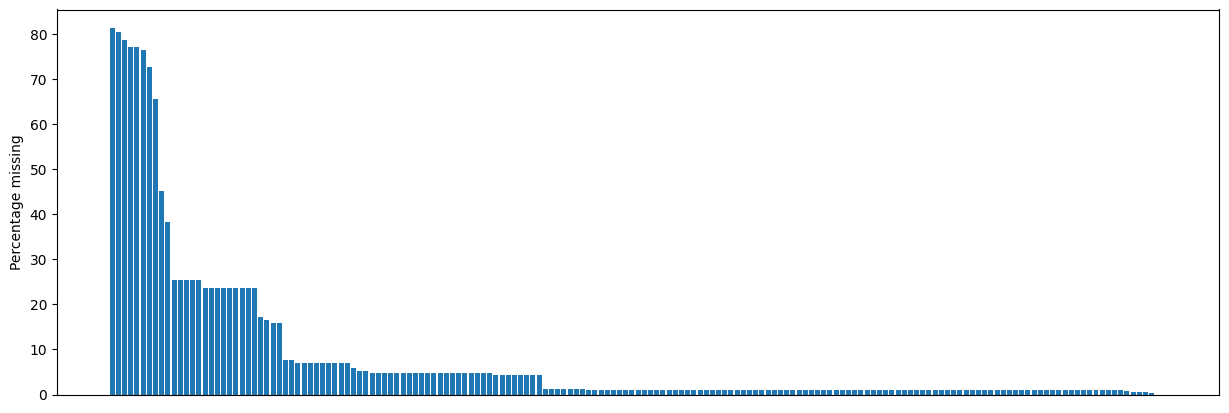

In [12]:
# Plotting Missing values count for each column
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,5))

missing = df.isna().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by=0, ascending = False)

ax.bar(missing.index, missing.values.T[0])
plt.xticks([])
plt.ylabel("Percentage missing")
plt.show()

Dropping columns which have more then 70% of missing values

In [13]:
#Dropping columns which have more then 70% of missing values
dropcols=missing[missing[0]>70]
dropcols

,0
br_000,81.410965
bq_000,80.501824
bp_000,78.794075
ab_000,77.086327
cr_000,77.086327
bo_000,76.533658
bn_000,72.761689


In [14]:
df.drop(list(dropcols.index),axis=1,inplace=True)

In [15]:
# Check shape of dataset after dropping the missing columns
df.shape

(36188, 164)

In [16]:
 missing_values_count= df.isnull().sum()
 total_cells=np.product(df.shape)
 total_missing=missing_values_count.sum()
 

NameError: name 'np' is not defined

In [ ]:
# Percentage of data that is missing
print(f"percentage of total missing cells in the data {(total_missing/total_cells) *100}%")

percentage of total missing cells in the data 5.37059852747306%


Visualization of unique values in target variable


positive:1000,Negative:35188


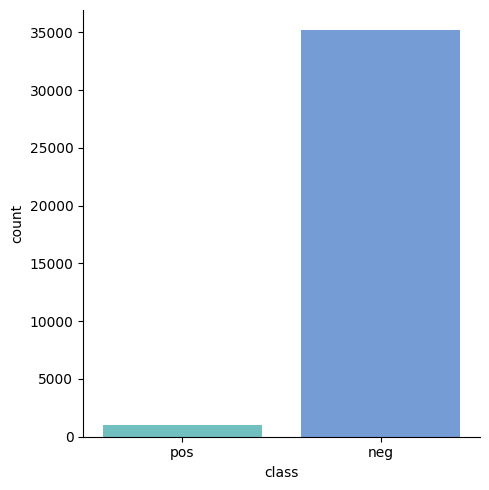

In [ ]:
pos=df[df['class']=='pos'].shape[0]
neg=df[df['class']=='neg'].shape[0]
print("positive:" +str(pos) + ",Negative:" + str(neg))
sns.catplot(data=df,x="class", kind= "count", palette="winter_r", alpha =0.6 )
plt.show()

Report

.) The target classes are highly imbalanced
.) Class imbalance is a scenario that arises when we have unequal distribution of class in a dataset i.e. the no. of data points in the   negative class (majority class) very large compared to that of the positive class (minority class)
.) If the imbalanced data is not treated beforehand, then this will degrade the performance of the classifier model.
.) Hence we should handle imbalanced data with certain methods.

How to handle Imbalance Data ?

(.) Resampling data is one of the most commonly preferred approaches to deal with an imbalanced dataset. There are broadly two types of methods for this i) Undersampling ii) Oversampling. In most cases, oversampling is preferred over undersampling techniques. The reason being, in undersampling we tend to remove instances from data that may be carrying some important information.
(.) SMOTE: Synthetic Minority Oversampling Technique
(.) SMOTE is an oversampling technique where the synthetic samples are generated for the minority class.
(.) Hybridization techniques involve combining both undersampling and oversampling techniques. This is done to optimize the performance of classifier models for the samples created as part of these techniques.
(.)It only duplicates the data and it won't add and new information. Hence we look at some different techniques.

Create Functions for model training and evaluation

In [ ]:
def evaluation_clf(true,predicted):
    '''
    This function takes true value and predicted value
    Returns: Accuracy,Precision, F1-Score,Recall, Roc-auc-Score
    '''
    acc=accuracy_score(true,predicted) #Calculate Accuracy
    f1=f1_score(true,predicted) #Calculate F1 score
    precision=-precision_score(true,predicted) # Calculate Precision 
    recall=recall_score(true,predicted) # Calculate Recall
    roc_auc= roc_auc_score(true,predicted) # calculate Roc-Auc Score
    return acc , f1 , precision , recall , roc_auc



In [ ]:
# Create the cost of model as per data description

def total_cost (y_true,y_pred):
    '''
    This function takes y_true ,y_prediction and Print Total cost due to misclassification
    '''
    tn, fp,fn,tp =confusion_matrix(y_true,y_pred).ravel()
    cost= 10*fp + 500*fn
    return cost

In [ ]:
 # Create a function which can evaluate a models and return report

 def evaluate_models(X ,y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splites the data into train test split
    Iterates through a given model dictionary and evaluates the metrics
    returns : DataFrame which contains report of all model metrics with cost
    '''

    # seperate Dataset into train and test
    X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=42)

    cost_list = []
    models_list = []
    accuracy_list = []

    for i in range (len(list(models))):
        model=list(model.values())[i]
        model.fit(X_train,y_train) #Train Model

        # Make Prediction
        y_train_pred=model.predict(X_train)
        y_test_pred=model.predict(X_test)

        # training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)
        train_cost = total_cost(y_train, y_train_pred)
        # Test Performance
        model_test_accuracy,model_test_f1,model_test_precision, \
        model_test_recall,model_test_rocauc_score = evaluation_clf(y_test,y_test_pred)
        test_cost=total_cost(y_test,y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print("Model performance for training set")
        print("- Accuracy: {:.4f}". format(model_train_accuracy))
        print("- F1 score {:.4f}". format(model_train_f1))
        print("-Precision: {:.4f}".format(model_train_precision))
        print("- Recall: {:.4f}").format(model_train_recall)
        print("- Roc Auc Score: {:.4f}".format(model_train_rocauc_score))
        print(f'- COST: {train_cost}.')

        print("_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _  _ _  _ _ _ _  _ _ _ _ _ _ _ _ _ _ _ _ _ _ _")

        print("Model performance for test set")
        print("- Accuracy: {:.4f}". format(model_test_accuracy))
        print("- F1 score {:.4f}". format(model_test_f1))
        print("-Precision: {:.4f}".format(model_test_precision))
        print("- Recall: {:.4f}").format(model_test_recall)
        print("- Roc Auc Score: {:.4f}".format(model_test_rocauc_score))
        print(f'- COST: {test_cost}.')
        cost_list.append(test_cost)
        print("="*35)
        print("\n")

        report= pd.DataFrame(list(zip(models_list,cost_list)),columns=['Model Name','Cost']).sort_values(by=["Cost"])

Plot distribution of all Independent Numerical variables

In [ ]:
numeric_features=[feature for feature in df.columns if df[feature].dtype != "O"]

KeyboardInterrupt: 

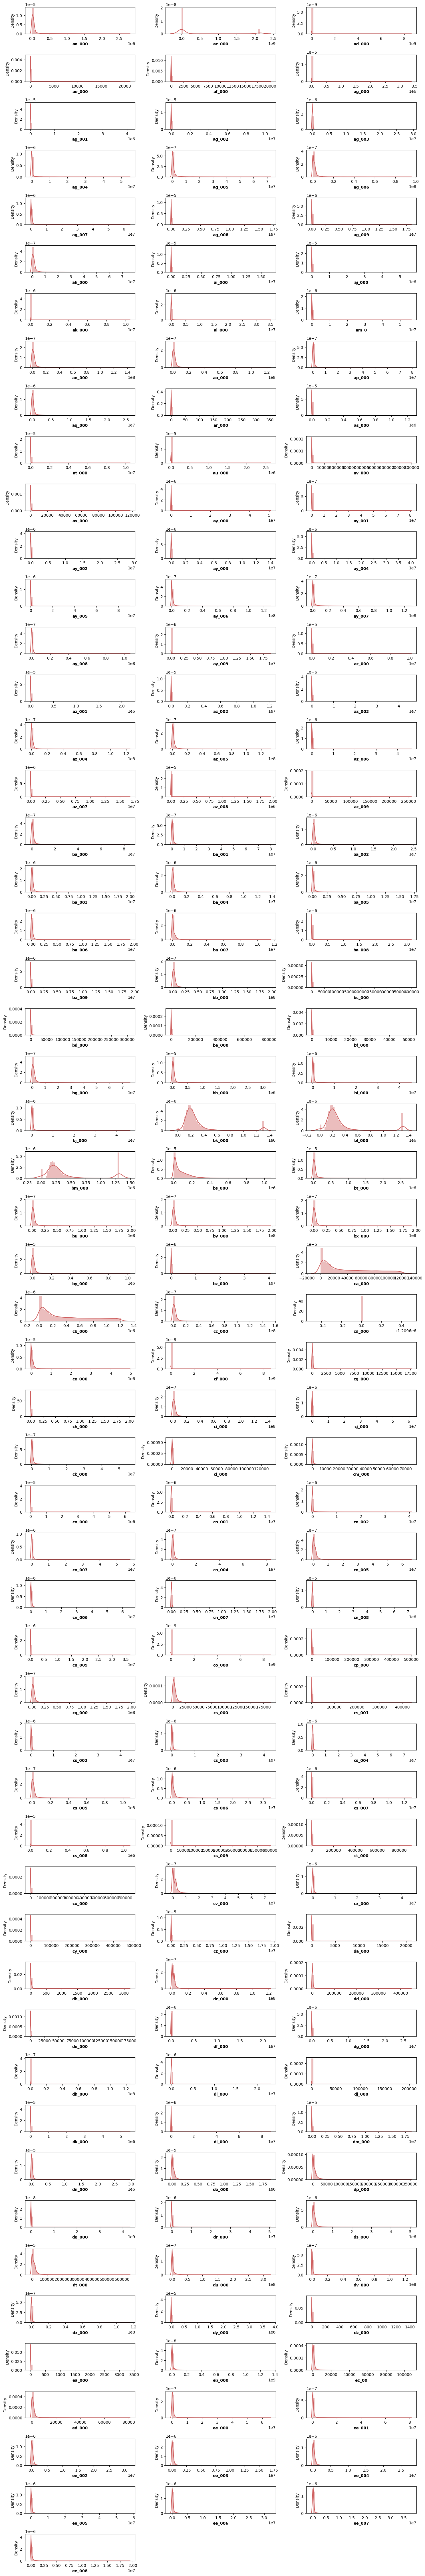

In [ ]:
plt.figure(figsize=(15,100))
for i, col in enumerate (numeric_features):
    plt.subplot(60, 3, i+1)
    sns.distplot(x=df[col],color="indianred")
    plt.xlabel(col, weight= "bold")
    plt.tight_layout()


Report:

[1.]As per the above plot most of the features are not normally distributed.
[2.]Transformation of data is not of prime importance since it is a classification problem.
[3.]Interpreting each and every column is not necessary as this is sensor data.

Evaluate Model on Different experiments

In [17]:
# Splitting X and y for all experiments
X= df.drop("class",axis=1)
y= df["class"]


Manually Encoding Target Variable

Exzperiments 1: KNN Inputer for Null Values
Why Robust Scaler not Standard Scaler ?

[1.] Scaling the data using robust scaler
[2.] Since Most of the Independent variables are not normally distributed we can not use standard Scaler

Why Robust scaler not MinMax Scaler?
[1.] Because most of the features have outliers.So MinMax will scale the data as per Max Values which is Outliers.
[2.] This Scaler removes the median and scale the data according to the quantile range (default to IQR: Interquartile range). The IQR is the range between the 1st quartile (25th quantile) and 3rd quartile (75th quantile)

In [19]:
# fit with robust scaler for KNN best K-Selection experiment
robustscaler= RobustScaler()
X1= robustscaler.fit_transform(X)
X1

array([[ 2.48316651e+00,  3.16455696e-02,             nan, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 8.58106804e+00,  2.92616034e+00,             nan, ...,
         3.42616452e+00,  0.00000000e+00,  0.00000000e+00],
       [ 8.43005945e-01,  1.52109705e+00,  2.26470588e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-6.28301407e-01,  2.24758046e+06, -2.69607843e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.00129058e+00,  2.24758046e+06,  8.97058824e-01, ...,
         1.92478692e+02,  0.00000000e+00,  0.00000000e+00],
       [ 1.86901072e-01,  5.75949367e-01,  1.22549020e+00, ...,
         7.82953419e-02,  0.00000000e+00,  0.00000000e+00]])

Why KNN Imputer?

(1.) KNN Imputer by scikit_learn is widely used method to impute missing values. It is widely being observed as a replacement for traditional imputation techniques.
(2.) KNN Imputer helps to impute missing values present in the observations by finding the nearest neighbours with the Euclidean distance matrix.
(3.) Here we iterates through different k values and get the accuracy and choose the best K values.


Finding the optimal n_neighbour value for KNN Imputer

In [20]:
results=[]
# define imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
strategies = [str(i) for i in [1,3,5,7,9]]
for s in strategies:
    pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', LogisticRegression())])
    scores = cross_val_score(pipeline, X1, y, scoring='accuracy', cv=2, n_jobs=-1)
    results.append(scores)
    print('n_neighbors= %s || accuracy (%.4f)' % (s , mean(scores)))


: 

: 